In [ ]:
import warnings
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import time

#visulaization modules
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

%matplotlib inline
init_notebook_mode(connected= True)

In [3]:
data = pd.read_csv('../data/full.csv')
data

,id,index,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,67.0,0,1,1,0,0,228.69,36.6,2,1
1,1,2,0,80.0,0,1,1,0,1,105.92,32.5,0,1
2,2,3,1,49.0,0,0,1,0,0,171.23,34.4,3,1
3,3,4,1,79.0,1,0,1,1,1,174.12,24.0,0,1
4,4,5,0,81.0,0,0,1,0,0,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,4903,5104,1,13.0,0,0,0,3,1,103.08,18.6,1,0
4904,4904,5106,1,81.0,0,0,1,1,0,125.20,40.0,0,0
4905,4905,5107,1,35.0,0,0,1,1,1,82.99,30.6,0,0
4906,4906,5108,0,51.0,0,0,1,0,1,166.29,25.6,2,0


In [4]:
data.drop('id', inplace=True, axis=1)
data.drop('index', inplace=True, axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   int64  
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   int64  
 5   work_type          4908 non-null   int64  
 6   Residence_type     4908 non-null   int64  
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   int64  
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 421.9 KB


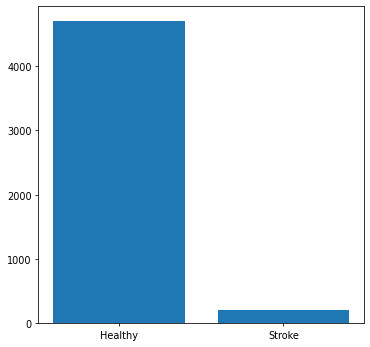

In [25]:
x = pd.DataFrame(data.groupby(['stroke'])['stroke'].count())

fig, ax = plt.subplots(figsize = (6,6), dpi = 70)
ax.bar(['Healthy', 'Stroke'],  [x.stroke[0], x.stroke[1]]) #, color='#fe346e', data=x.stroke[1]/5000)

ax.set_facecolor('#fff')

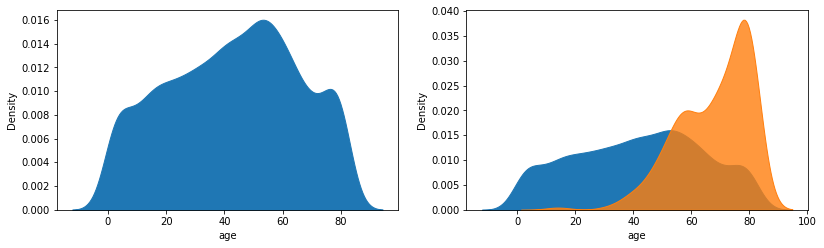

In [14]:
fig = plt.figure(figsize = (25,15))
gs = fig.add_gridspec(24,24)

ax1 = fig.add_subplot(gs[0:6,0:6])
ax2 = fig.add_subplot(gs[0:6, 7:13])

sns.kdeplot(data = data, x = 'age', ax = ax1, shade = True, alpha = 1, )

sns.kdeplot(data = data[data['stroke'] == 0], x = 'age',ax = ax2, shade = True,  alpha = 1)
sns.kdeplot(data = data[data['stroke'] == 1], x = 'age',ax = ax2, shade = True,  alpha = 0.8)

fig.show()

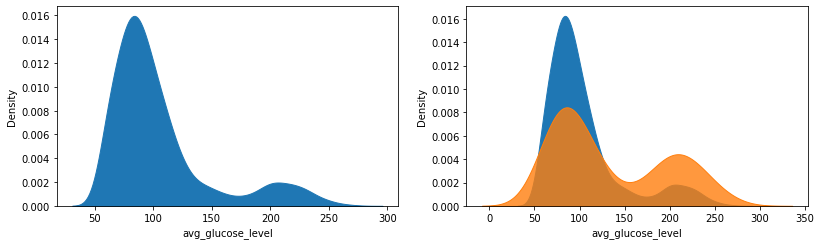

In [16]:
fig = plt.figure(figsize = (25,15))
gs = fig.add_gridspec(24,24)

ax1 = fig.add_subplot(gs[0:6,0:6])
ax2 = fig.add_subplot(gs[0:6, 7:13])

sns.kdeplot(data = data, x = 'avg_glucose_level', ax = ax1, shade = True, alpha = 1, )

sns.kdeplot(data = data[data['stroke'] == 0], x = 'avg_glucose_level',ax = ax2, shade = True,  alpha = 1)
sns.kdeplot(data = data[data['stroke'] == 1], x = 'avg_glucose_level',ax = ax2, shade = True,  alpha = 0.8)

fig.show()

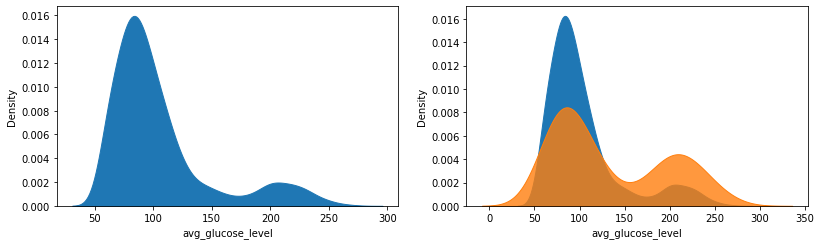

In [8]:
fig = plt.figure(figsize = (25,15))
gs = fig.add_gridspec(24,24)

ax1 = fig.add_subplot(gs[0:6,0:6])
ax2 = fig.add_subplot(gs[0:6, 7:13])

sns.kdeplot(data = data, x = 'avg_glucose_level', ax = ax1, shade = True, alpha = 1, )

sns.kdeplot(data = data[data['stroke'] == 0], x = 'avg_glucose_level',ax = ax2, shade = True,  alpha = 1)
sns.kdeplot(data = data[data['stroke'] == 1], x = 'avg_glucose_level',ax = ax2, shade = True,  alpha = 0.8)

fig.show()

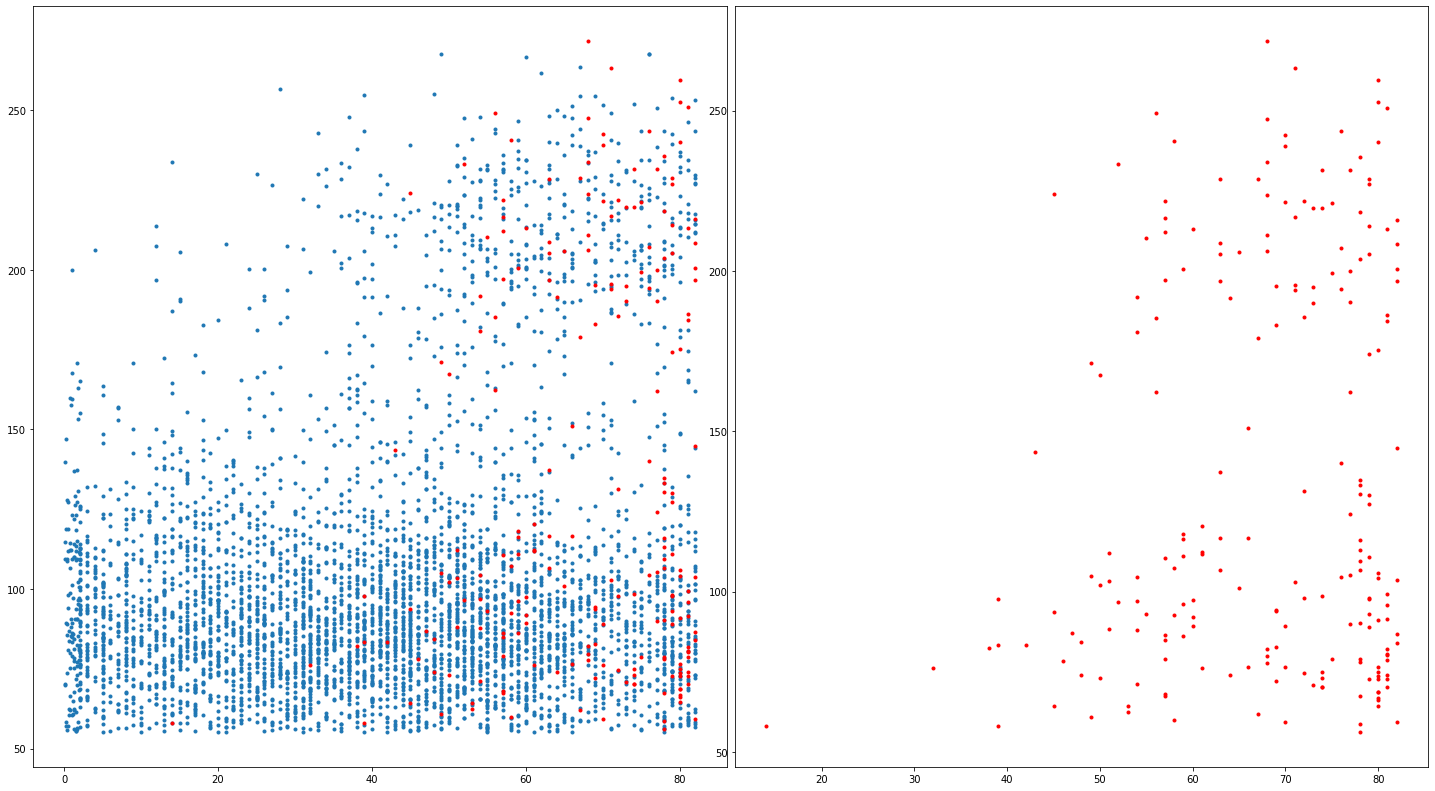

In [6]:
fig = plt.figure(figsize = (25,15))
gs = fig.add_gridspec(15,30)

ax1 = fig.add_subplot(gs[1:15,0:15])
ax2 = fig.add_subplot(gs[1:15, 15:30])

ax1.plot(data[data['stroke'] == 0]['age'], data[data['stroke'] == 0]['avg_glucose_level'], '.')
ax1.plot(data[data['stroke'] == 1]['age'], data[data['stroke'] == 1]['avg_glucose_level'], '.', color='red')
ax2.plot(data[data['stroke'] == 1]['age'], data[data['stroke'] == 1]['avg_glucose_level'], '.', color='red')
#ax1.set_title('Without heart disease')

Text(0.5, 1.0, 'Heart_disease')

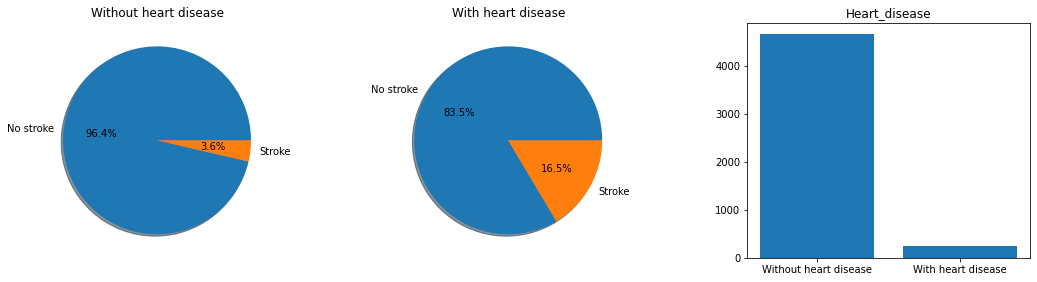

In [12]:
x = pd.DataFrame(data.groupby(['heart_disease', 'stroke'])['heart_disease'].count())

fig = plt.figure(figsize = (25,15))
gs = fig.add_gridspec(10,24)

ax1 = fig.add_subplot(gs[1:4,0:6])
ax2 = fig.add_subplot(gs[1:4, 6:12])
ax3 = fig.add_subplot(gs[31:4, 13:18])

ax1.pie([x.heart_disease[0][0], x.heart_disease[0][1]], labels=['No stroke', "Stroke"], autopct='%1.1f%%', shadow=True)
ax1.set_title('Without heart disease')
ax2.pie([x.heart_disease[1][0], x.heart_disease[1][1]], labels=['No stroke', "Stroke"], autopct='%1.1f%%', shadow=True)
ax2.set_title('With heart disease')
ax3.bar(['Without heart disease', 'With heart disease'],  [x.heart_disease[0].sum(), x.heart_disease[1].sum()])
ax3.set_title('Heart_disease')

Text(0.5, 1.0, 'Hypertension')

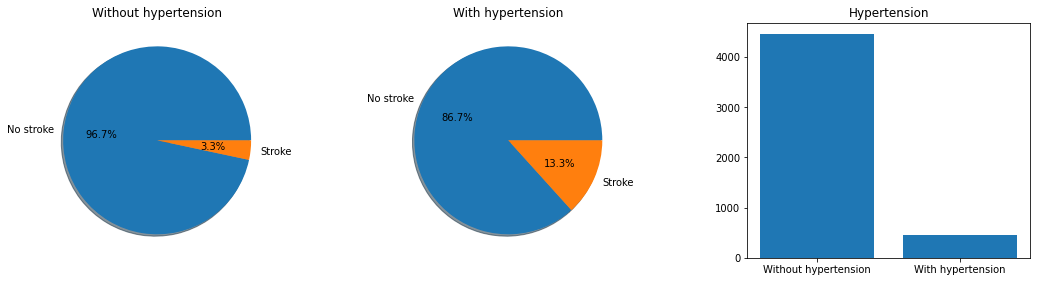

In [13]:
x = pd.DataFrame(data.groupby(['hypertension', 'stroke'])['hypertension'].count())

fig = plt.figure(figsize = (25,15))
gs = fig.add_gridspec(10,24)

ax1 = fig.add_subplot(gs[1:4,0:6])
ax2 = fig.add_subplot(gs[1:4, 6:12])
ax3 = fig.add_subplot(gs[1:4, 13:18])

ax1.pie([x.hypertension[0][0], x.hypertension[0][1]], labels=['No stroke', "Stroke"], autopct='%1.1f%%', shadow=True)
ax1.set_title('Without hypertension')
ax2.pie([x.hypertension[1][0], x.hypertension[1][1]], labels=['No stroke', "Stroke"], autopct='%1.1f%%', shadow=True)
ax2.set_title('With hypertension')
ax3.bar(['Without hypertension', 'With hypertension'],  [x.hypertension[0].sum(), x.hypertension[1].sum()])
ax3.set_title('Hypertension')

Text(0.5, 1.0, 'Gender')

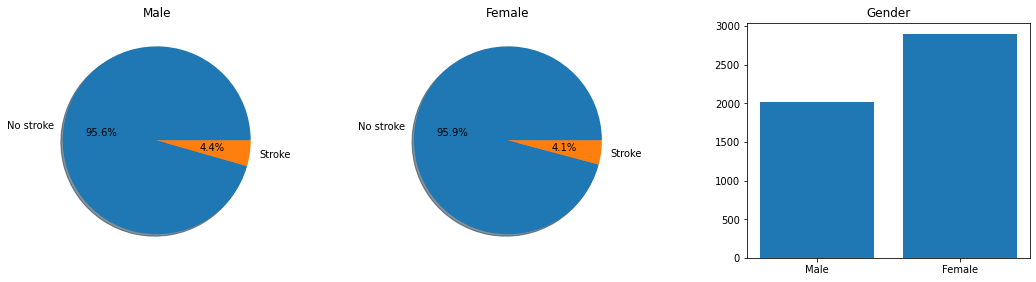

In [14]:
x = pd.DataFrame(data.groupby(['gender', 'stroke'])['gender'].count())

fig = plt.figure(figsize = (25,15))
gs = fig.add_gridspec(10,24)

ax1 = fig.add_subplot(gs[1:4,0:6])
ax2 = fig.add_subplot(gs[1:4, 6:12])
ax3 = fig.add_subplot(gs[1:4, 13:18])

ax1.pie([x.gender[0][0], x.gender[0][1]], labels=['No stroke', "Stroke"], autopct='%1.1f%%', shadow=True)
ax1.set_title('Male')
ax2.pie([x.gender[1][0], x.gender[1][1]], labels=['No stroke', "Stroke"], autopct='%1.1f%%', shadow=True)
ax2.set_title('Female')
ax3.bar(['Male', 'Female'],  [x.gender[0].sum(), x.gender[1].sum()])
ax3.set_title('Gender')

Text(0.5, 1.0, 'Work Type')

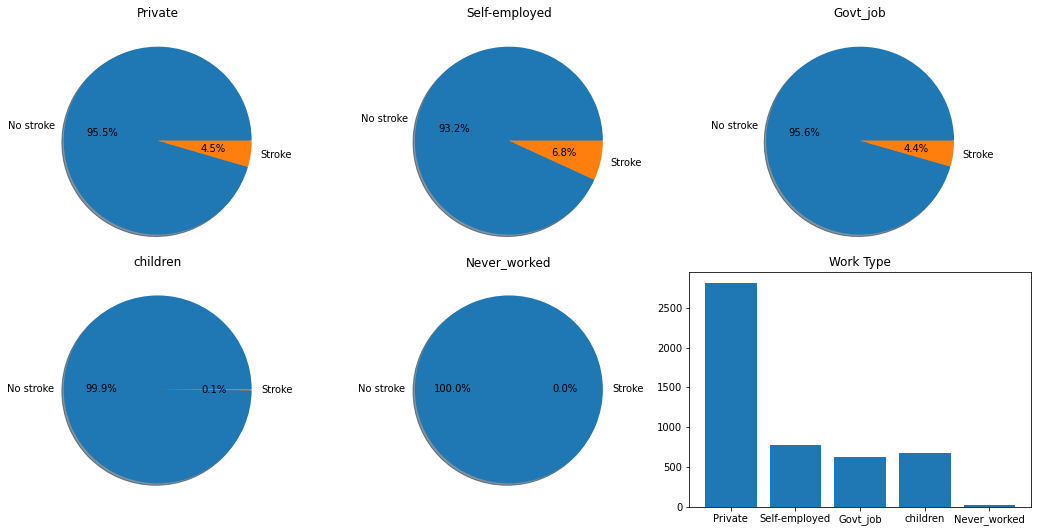

In [17]:
x = pd.DataFrame(data.groupby(['work_type', 'stroke'])['work_type'].count())

fig = plt.figure(figsize = (25,15))
gs = fig.add_gridspec(10,24)

ax1 = fig.add_subplot(gs[1:4,0:6])
ax2 = fig.add_subplot(gs[1:4, 6:12])
ax3 = fig.add_subplot(gs[1:4, 12:18])
ax4 = fig.add_subplot(gs[4:7, 0:6])
ax5 = fig.add_subplot(gs[4:7, 6:12])
ax6 = fig.add_subplot(gs[4:7, 12:18])


ax1.pie([x.work_type[0][0], x.work_type[0][1]], labels=['No stroke', "Stroke"], autopct='%1.1f%%', shadow=True)
ax1.set_title('Private')
ax2.pie([x.work_type[1][0], x.work_type[1][1]], labels=['No stroke', "Stroke"], autopct='%1.1f%%', shadow=True)
ax2.set_title('Self-employed')
ax3.pie([x.work_type[2][0], x.work_type[2][1]], labels=['No stroke', "Stroke"], autopct='%1.1f%%', shadow=True)
ax3.set_title('Govt_job')
ax4.pie([x.work_type[3][0], x.work_type[3][1]], labels=['No stroke', "Stroke"], autopct='%1.1f%%', shadow=True)
ax4.set_title('children')
ax5.pie([x.work_type[4][0], 0], labels=['No stroke', "Stroke"], autopct='%1.1f%%', shadow=True)
ax5.set_title('Never_worked')
ax6.bar(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],  [x.work_type[0].sum(), x.work_type[1].sum(), x.work_type[2].sum(), x.work_type[3].sum(), x.work_type[4].sum()])
ax6.set_title('Work Type')

Text(0.5, 1.0, 'Ever married')

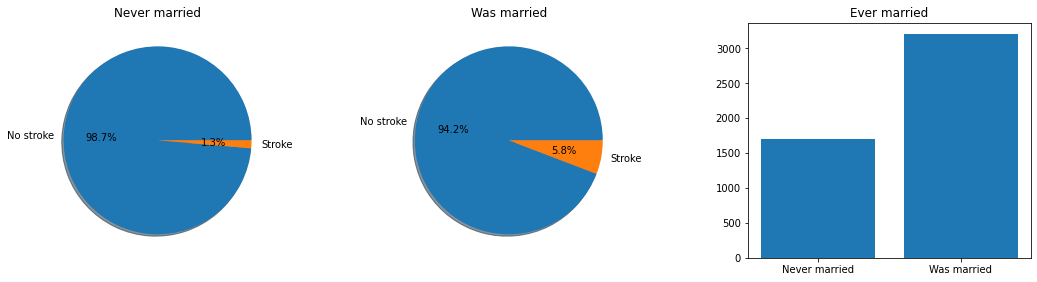

In [17]:
x = pd.DataFrame(data.groupby(['ever_married', 'stroke'])['ever_married'].count())

fig = plt.figure(figsize = (25,15))
gs = fig.add_gridspec(10,24)

ax1 = fig.add_subplot(gs[1:4,0:6])
ax2 = fig.add_subplot(gs[1:4, 6:12])
ax3 = fig.add_subplot(gs[1:4, 13:18])

ax1.pie([x.ever_married[0][0], x.ever_married[0][1]], labels=['No stroke', "Stroke"], autopct='%1.1f%%', shadow=True)
ax1.set_title('Never married')
ax2.pie([x.ever_married[1][0], x.ever_married[1][1]], labels=['No stroke', "Stroke"], autopct='%1.1f%%', shadow=True)
ax2.set_title('Was married')
ax3.bar(['Never married', 'Was married'],  [x.ever_married[0].sum(), x.ever_married[1].sum()])
ax3.set_title('Ever married')

<AxesSubplot:>

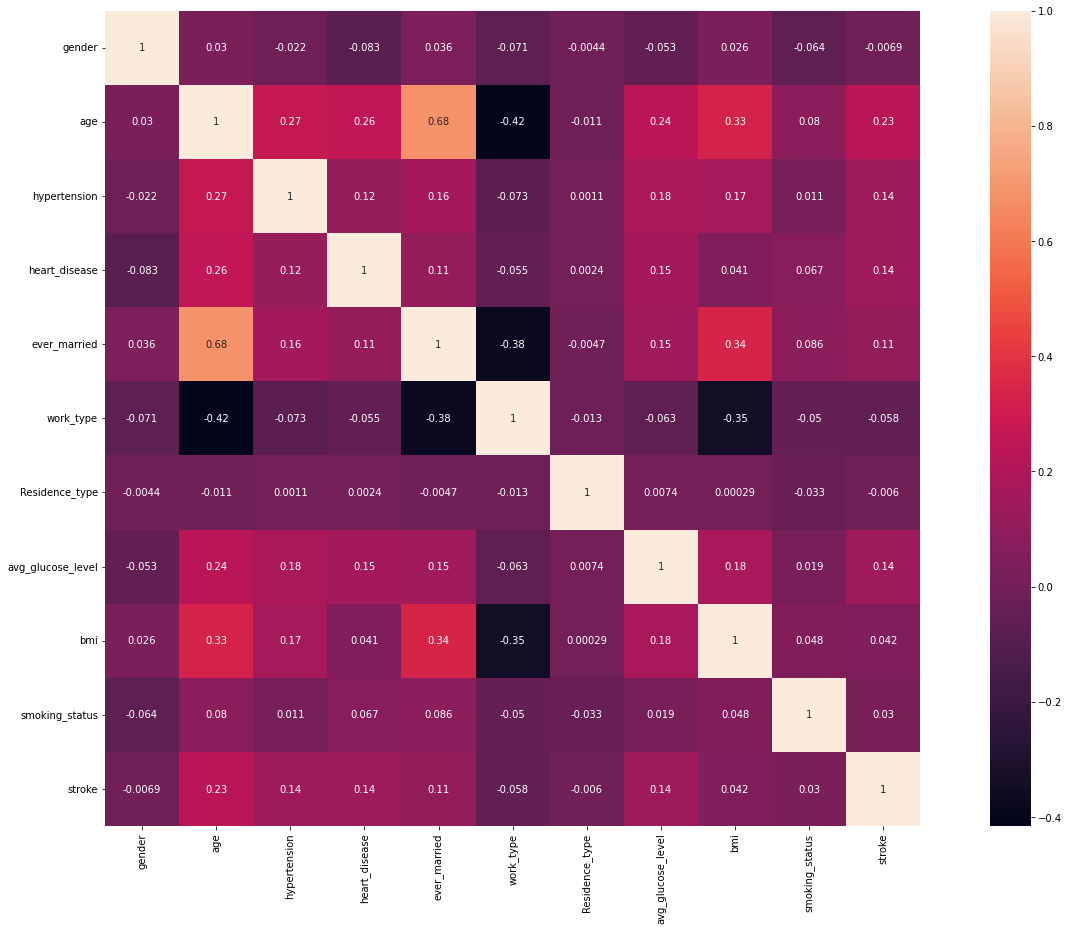

In [18]:
fig = plt.figure(figsize = (25,15))
corrmat = data.corr()
sns.heatmap(corrmat, annot=True, square=True)